# Getting started

Genome-scale metabolic models (GSMMs) computationally describe gene-protein reaction associations for entire metabolic pathways in an organism and can be simulated to predict metabolic fluxes for various system-level metabolic studies. Thus a GSMM represents a compilation of transcriptomic, proteomic and metabolomic omics data sets. A metabolic network consists of two main components: the stoichiometric matrix (S-matrix) and a set of rules for gene-protein reaction relationships (GPR). The S-matrix consists of biochemical reactions that take place in an organism, while GPR relationships represent conditional statements in Boolean logic between open reading frames (ORFs) and their enzymatic functions in the S-matrix.

Flux balance analysis (FBA) is a mathematical procedure for simulating metabolism in genome-wide reconstructions of metabolic networks. This method uses linear programming to obtain the maximum potential of the target function under consideration, and therefore FBA is used to find a single solution to the optimisation problem. This is done by constraining the S-matrix of a genome-scale model by defining recording limits and setting lower and upper limits for reactions.

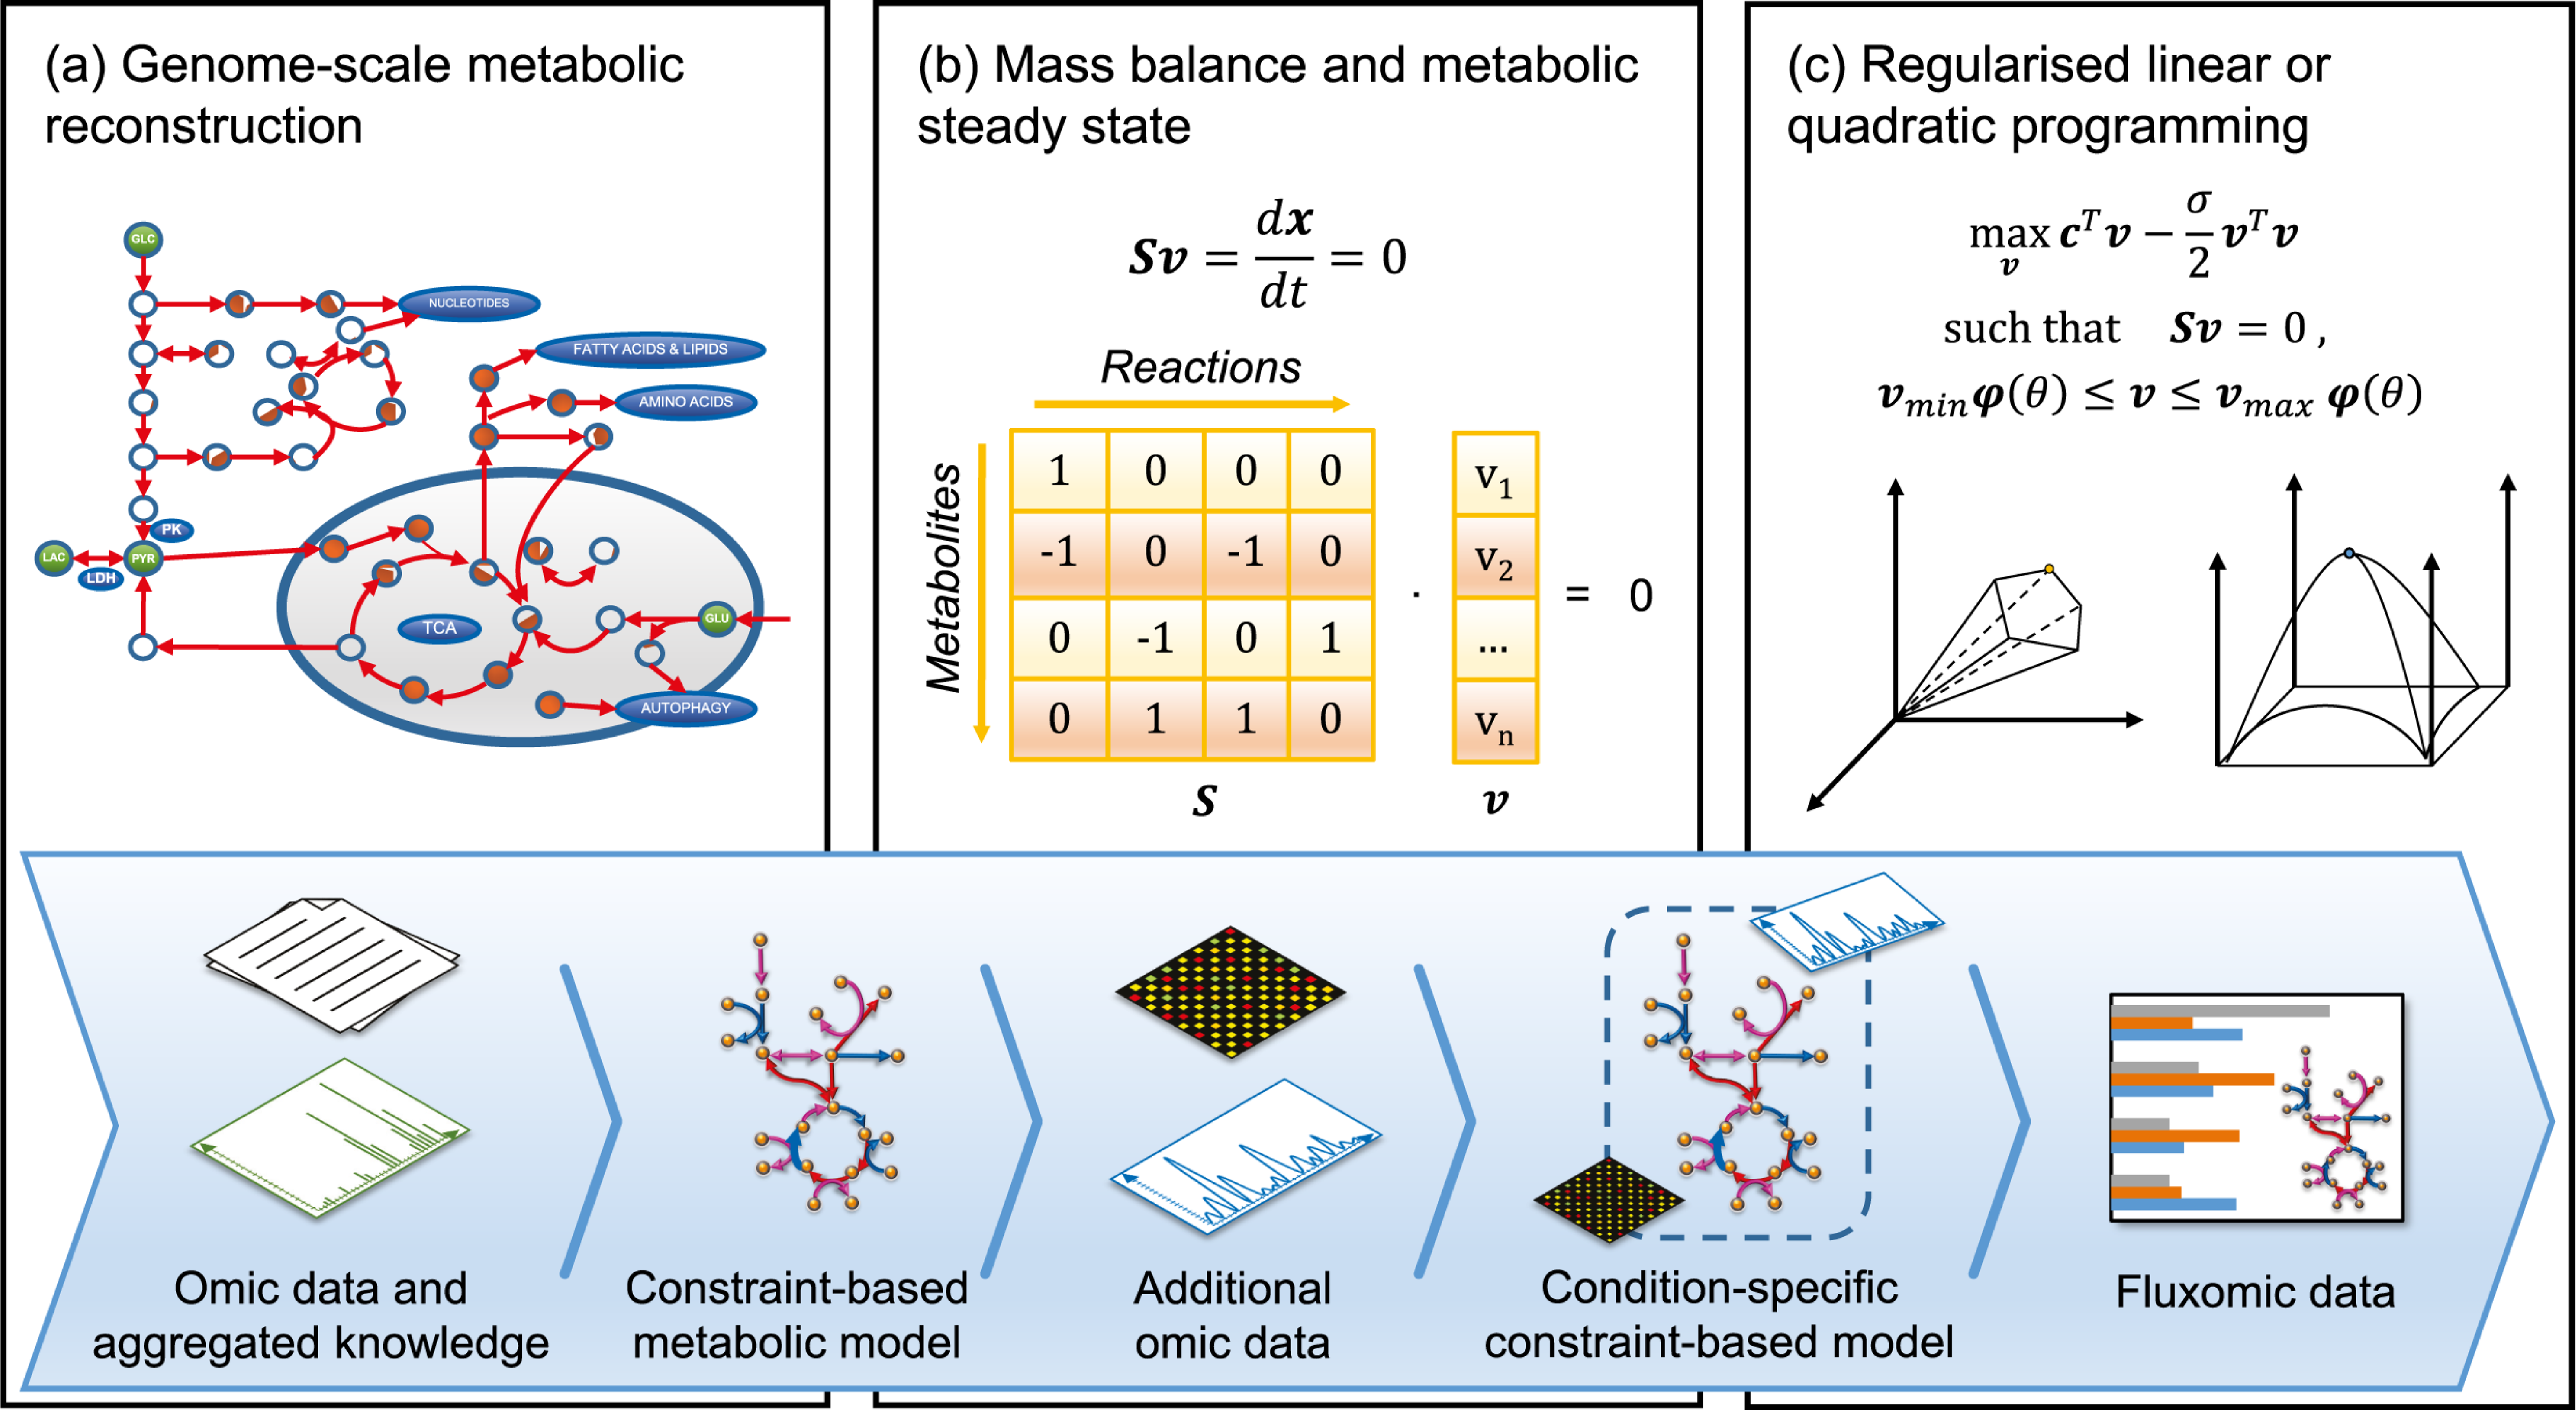

## Importing Python libraries

Python is a modular system with a few general purpose functions. Most usefull functions, however, must be explicitely activated by loading the libraries with which the functions are associated. For example, to navigate in the computer file system and to access files the library `os` need to be imported. 

Some libraries are present in all Python installations, like `os`. Other libraries are less commonly used and are not shipped with the standard Python installation and need subsequent manual installation. The manual installation is performed using the `%pip install` command. For example, the function to download content from the internet is accomplished with the `wget` function. A `try` command is used to load the function `wget` if it is already present, if this fails the `except` command is installing the library.

The COBRApy Toolbox is used to load a model in a jupyter notebook. `cobra` is a python package that provides a simple interface to metabolic constraint-based reconstruction and analysis. The package includes simple, object-oriented interfaces for model construction (including reading to/from sbml, matlab, and json formats) and implements commonly used COBRA methods such as flux balance analysis, flux variability analysis, and gene deletion analyses.

In [1]:
# file system and path operations
import os
# update package versions
!pip install numpy==1.26.4

# load wget and install it if necessary
try:
    import wget
except:
    print('Installing wget')
    !pip install wget
    import wget
# load cobra toolbox and install it if necessary
try:
    from cobra.io import read_sbml_model
    print('Cobra toolbox is already installed')
except:
    print('Installing cobra toolbox')
    !pip install cobra
    from cobra.io import read_sbml_model

# check whether the hub runs on colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

print('Done')

Cobra toolbox is already installed
Done


## Loading a model

The next step is to download a genome-scale model. The `ecoli_core_model` serves as an example. This is available at http://bigg.ucsd.edu/models/e_coli_core. In the following cell the model is downloaded via the Python command `wget` and stored within the `Data` folder. You can now use this model for further work within the jupyter notebook.

In [ ]:
# check if the file 'e_coli_core.xml.gz' is in the `Data` directory
if IN_COLAB:
    ModelFile = os.path.join('.', 'e_coli_core.xml.gz')
else:
    ModelFile = os.path.join('..', 'Data', 'e_coli_core.xml.gz')

if os.path.isfile(ModelFile):
    print('Loading existing file e_coli_core.xml.gz')
else:
    print('Download of file e_coli_core.xml.gz from BIGG')
    # download the file from BIGG and save it in the `Data` directory
    wget.download('http://bigg.ucsd.edu/static/models/e_coli_core.xml.gz')
    # move the file to the `Data` directory
    os.rename('e_coli_core.xml.gz', ModelFile)
    print('Done')


The *E. coli* core model is saved and shared in the Systems Biology Markup Language (SBML) as type `xml`. The `cobra`-toolbox (constraint based reconstruction and analysis) can be import and convert SBML-files into a structured for further analysis by using the command `read_sbml_model`. The model is stored in the Python variable `model` and writing the variable name `model` at the end of the cell provides details of the model.

In [ ]:
model = read_sbml_model(ModelFile)
model

## Model content

### Metabolites

The model contains a list of metabolites. Here are the first ten.

In [ ]:
model.metabolites[0:10]

Command [0:10] indicates that reactions one to ten are displayed. The number of reactions can be changed by specifying other values in the square brackets. For example, if the reactions 5 to 30 are to be displayed, the command looks like this: [4:30]. If you want to display all the metabolites of the model, you can simply omit [0:10]. 

If you want to know how many metabolites are contained in the model, use the "len" command. There are 72 metabolites in the model.

In [ ]:
len(model.metabolites)

The `query` command allows searching through the metabolite list. The result shows the id of this metabolite in the model.

In [ ]:
model.metabolites.query('glc')

One can access properties of a metabolite using `get_by_id` with the metabolite id.

In [ ]:
model.metabolites.get_by_id('glc__D_e')

Each metabolite property (e.g. `Name`, `Formula`, `Compartment`) can be individually accessed by adding the property name to the Metabolite access command. For example, to find out the compartment of glyceraldehyde 3-phosphate (g3p_c):

In [ ]:
model.metabolites.get_by_id('g3p_c').compartment

### Exercise
Find the model ID for the metabolite citrate by a query with the `cit` abbreviation. Use the metabolite access command to identify the full name, formula and different compartments for citrate. Metabolite IDs tend to have human readable abbreviations. Therefore, query the model metabolites with the the short form `cit` from citrate. Several different metabolites might contain the search word, find out which one is the right citrate.
 - The first cell below, the model metabolite ID is searched.
 - The second cell reports the full name (`...name`), formula (`...formula`) and participating reactions (`...reactions`)

Replace the keyword `None` with the correct input.

In [ ]:
model.metabolites.query('None')

In [ ]:
print(model.metabolites.get_by_id('None').None)
print(model.metabolites.get_by_id('None').None)
print(list(model.metabolites.get_by_id('None').None))

Other attributes stored for metabolites in the model include elemental composition (`elements`), molecular weight (`formula_weight`), annotations (`annotation`).

### Reactions

The model contains a list of reactions. Here are the first 10 of them.

In [ ]:
model.reactions[0:10]

In [ ]:
len(model.reactions)

Let's take a closer look at the reactions associated with fructose 6-phosphate (f6p_c).

In [ ]:
for reaction in model.metabolites.get_by_id('f6p_c').reactions:
    print(reaction.id, reaction, reaction.name)

In [ ]:
model.reactions.get_by_id('PFK').name

### Gene-Protein-Reaction associations

Phosphofructokinase (PFK) on the other hand seems to be associated with two isozymes.

In [ ]:
model.reactions.get_by_id('PFK').gene_reaction_rule

One can display the gene names (typical 4 letter gene codes) instead of the identifiers (Blattner numbers in this case).

In [ ]:
model.reactions.get_by_id('PFK').gene_name_reaction_rule

### Finding things


One can use .query('search term', 'attribute_to_search_in') to search in model metabolites, reactions, and genes. For example, one can search metabolites that contain the term glucose in their name. If in doubt about the writing style, also name fragments will work, e.g., lucose to find *G*lucose or *g*lucose.

In [ ]:
for metabolite in model.metabolites.query('lucose', 'name'):
    print(metabolite.name)

### The stoichiometric matrix S

In [ ]:
from cobra.util import create_stoichiometric_matrix
s=create_stoichiometric_matrix(model)
s

This is how the the stoichiometry matrix S looks like when visualized as a matrix plot. For this representation matplotlib is used. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.spy(s)

### Simulating models

In a flow balance analysis, the aim is to achieve a specific objective which is set in advance. If you want to display this target, enter the command below. In this case the stoichiometric processes of the e.coli_core_model are considered, which are responsible for biomass production and this production should be increased.

In [ ]:
print(model.objective)

A quick overview to all exchange fluxes with substrates taken up and metabolites secreted by the cell are accessed via:


In [ ]:
model.summary()

The following command displays all reactions and flows that are optimised to achieve this goal: 

In [ ]:
model.optimize()

Sometimes a solution cannot be found. For example, setting the lower bound of the objective function to a very high value that the model cannot achieve will trigger a warning when trying to optimize the model. Parameters reported from an infeasible model are not meaningful to interpret (except in rare occasions when you may want to figure out why a model is infeasible).

All commands that have just been presented for the metabolites and reactions can of course also be used for the genes, for example:

In [ ]:
model.genes[0:10]

## Making temporary changes to the model

In biotechnology a genome scale model is used to investigate the effects of changing the medium or the objective function on the flux distributions in the metabolic network. Changing critical model properties is shown in the following.

Here, the 'with model' statements starts the context and changes done to the model one indentation level to the right, are automatically recorded. When that block finishes, the context manager is requested to roll-back all changes leaving the model looking exactly as it did before all the changes.

Changing flux bounds can also be done reversibly. For example let's set the lower and upper bound of phosphoglycerate kinase (PGK) to 0 (effectively knocking out the reaction).

In [ ]:
with model:
    model.reactions.get_by_id('PGK').bounds = 0, 0
    print("PGK's bounds inside the with statement")
    print(model.reactions.PGK.lower_bound, model.reactions.PGK.bounds)
    print('Mutant growth rate: ', model.optimize().objective_value)
print("PGK's bounds outside the with statement")
print(model.reactions.PGK.bounds)

### Slim versus full optimize

Mathematical solvers are now so fast that for many small to mid-size models computing the solution can be even faster than it takes us to collect the values from the solver and convert that to objects that are usable for in python. When we use model.optimize we gather values for all reactions and metabolites and that can take some time. If we are only interested in the flux value of a single reaction or the objective, it is faster to instead use model.slim_optimize which only does the optimization and returns the objective value leaving it up to you to fetch other values that you may need. For example, let's optimize and get the flux value of the ATPM reaction.

In [ ]:
%%time
solution=model.optimize()
solution.fluxes['ATPM']

In [ ]:
%%time
model.slim_optimize()
model.reactions.ATPM.flux

### Changing the medium

The media composition can also be displayed and, if necessary, optimised in relation to the specified objective of the flux balance analysis. One can access the medium condition using model.medium. The indicated bound is the effective upper uptake bound.

In [ ]:
model.medium

In [ ]:
solution=model.optimize()
print(solution.fluxes['BIOMASS_Ecoli_core_w_GAM'])

Changing the carbon source in the medium can be achieved by adjusting the flux bounds of the respective exchange reactions appropriately. For example, the following code block removes glucose from the medium and adds succinate.

In [ ]:
with model:
    medium=model.medium
    medium['EX_glc__D_e']=0
    medium['EX_succ_e']=10
    model.medium=medium
    solution=model.optimize()
    print(solution.fluxes['BIOMASS_Ecoli_core_w_GAM'])

Changing the carbon source to succinate led to a significant drop in growth rate.

### Exercise (10 min)
Change the carbon source in the medium to a different carbon source. What is the difference in the growth rate observed? How about growing *E. coli* under anaerobic conditions?

In [ ]:
with model:
    medium=model.medium
    medium[None]=None
    model.medium=medium
    solution=model.optimize()
    print(solution.fluxes['BIOMASS_Ecoli_core_w_GAM'])

### Adding reactions and pathways

To add reactions and pathways the tools "Reaction" and "Metabolite" from COBRApy are used. 

In [ ]:
from cobra import Reaction, Metabolite

Ok, let's create a new reactions.

In [ ]:
new_reaction=Reaction('alchemy')

This reaction is going to convert water into gold (unfortunately lead is not part of E. coli metabolism; creating wine would be blasphemy). So we need to create a new metabolite, since gold is not yet part of E. coli's native metabolism.

In [ ]:
gold=Metabolite(id='gold_c', compartment='c')

Now, we're going to specify the reaction's stoichiometry.

In [ ]:
new_reaction.add_metabolites({model.metabolites.h2o_c: -1, gold: 1})
print(new_reaction.build_reaction_string())

Now, let's add the new reaction to the model.

In [ ]:
model.add_reactions([new_reaction])

Quickly check that the reaction was indeed added to the model.

In [ ]:
model.reactions.alchemy

Let's produce some gold then!

In [ ]:
model.objective=model.reactions.alchemy
model.optimize().objective_value

What happened? Forgot to add an exchange reaction so that gold can leave the system.

In [ ]:
model.add_boundary(model.metabolites.gold_c, type='demand')

In [ ]:
model.objective=model.reactions.alchemy
model.optimize().objective_value